In [2]:
# --- Imports and Dataset Loading ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Load Dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# --- Basic Info ---
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


0

In [5]:
# --- Drop unnecessary columns ---
df.drop(['customerID'], axis=1, inplace=True)

In [6]:
# --- Convert TotalCharges to numeric ---
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

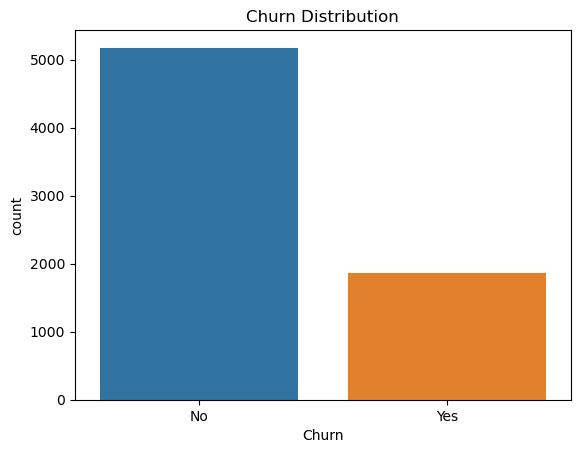

In [7]:
# --- Univariate Analysis ---
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

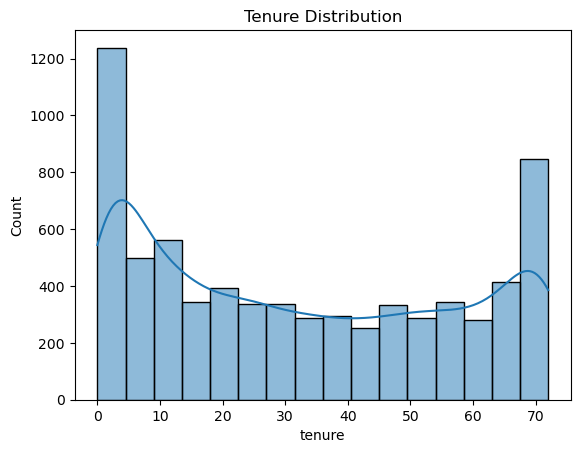

In [8]:
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.show()

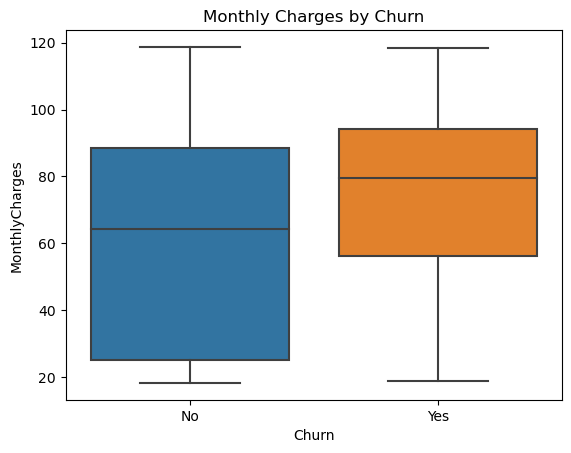

In [9]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

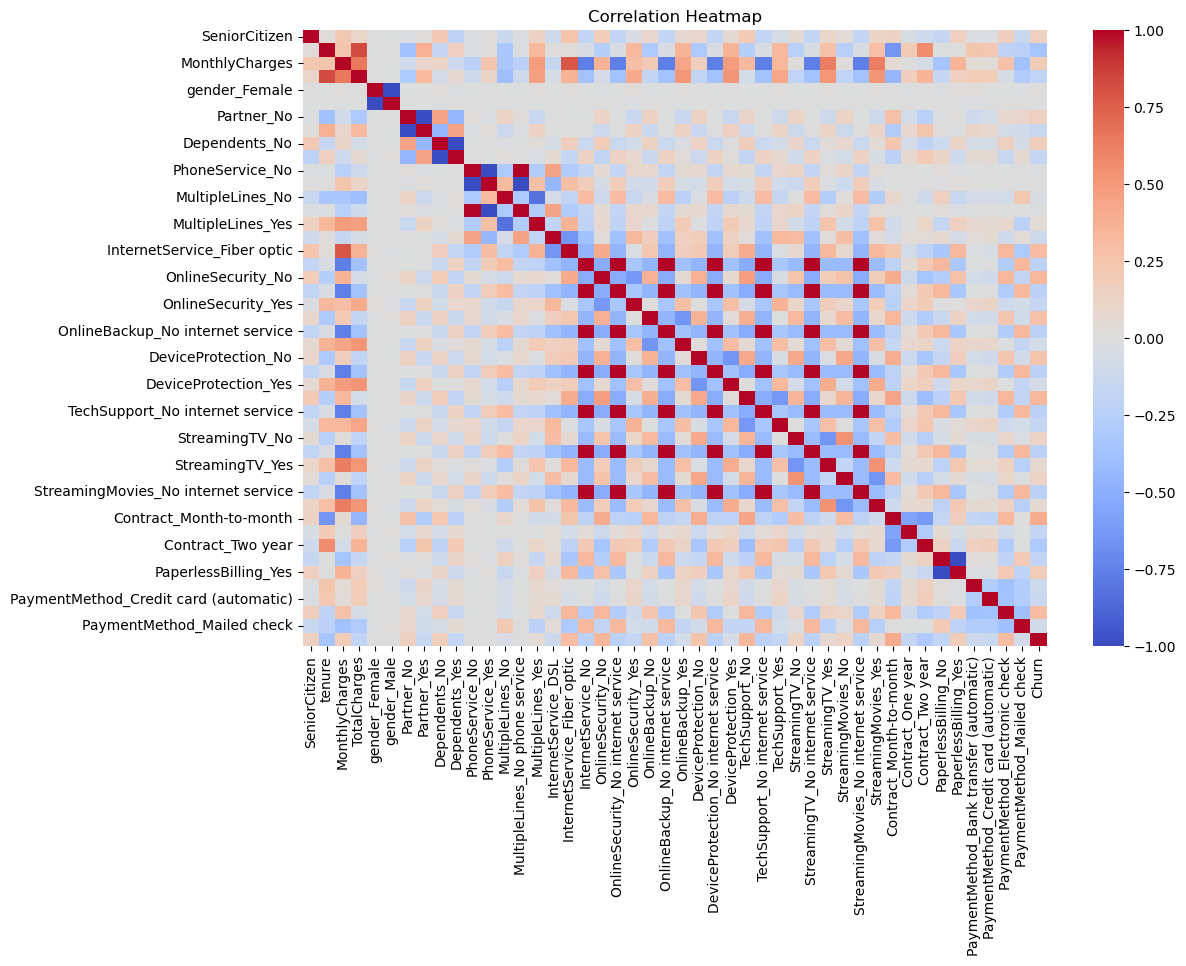

In [10]:
# --- Bivariate Heatmap ---
encoded_df = pd.get_dummies(df.drop('Churn', axis=1))
encoded_df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

---------------------------------------------------------

#CLUSTERING

In [11]:
# Select Features for Clustering
clustering_features = df[['MonthlyCharges', 'tenure', 'TotalCharges']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)


C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\clust

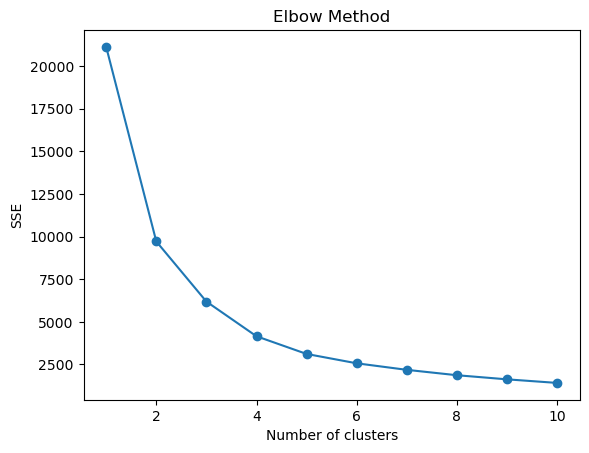

In [12]:
# --- Elbow Method ---
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [13]:
# --- Fit KMeans with k=4 (example) ---
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


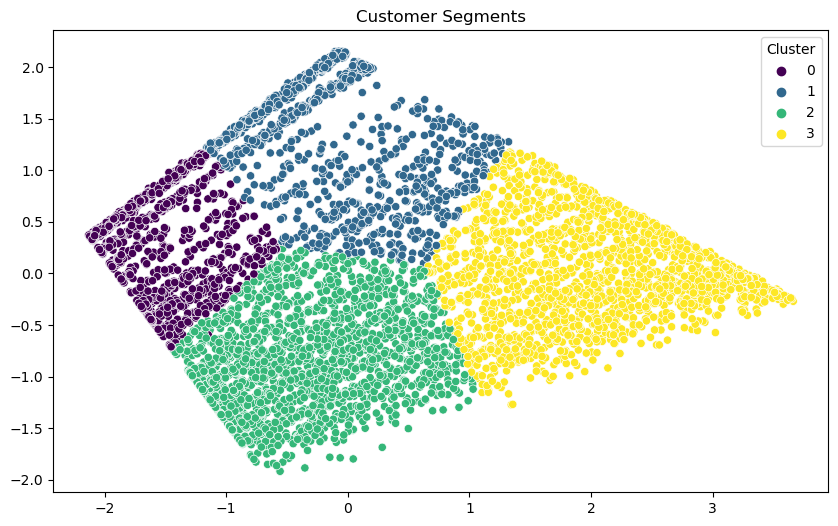

In [14]:
# --- Visualize Clusters ---
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.show()

---------------------------------------------------------------------

Churn_Prediction

In [15]:
# Encode Categorical Columns
df_encoded = pd.get_dummies(df.drop('Cluster', axis=1), drop_first=True)


In [16]:
# Define Features and Target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

In [17]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[941  95]
 [202 171]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8372115892223131


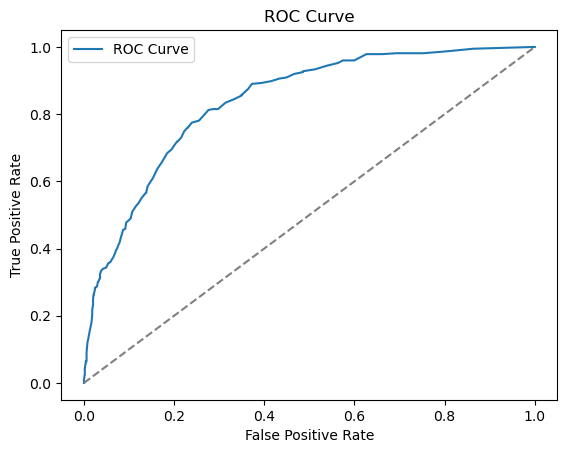

In [21]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


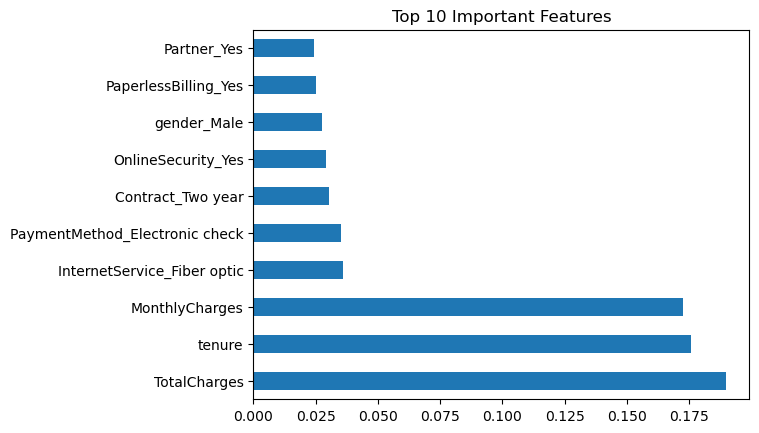

In [22]:
# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

In [25]:
# Save visuals separately
# plt.savefig(r'OneDrive/Desktop/Freelancing/Sample projects/Customer-Segmentation-Churn-Prediction/visuals')